# Equaciones de Lorenz 

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

from scipy.integrate import solve_ivp

In [2]:
def Lorenz_eq(t,xyz,sigma,beta,rho):
    x,y,z = xyz
    return [sigma*(y-x),x*(rho-z)-y,x*y-beta*z]

In [3]:
time = [0,100]
t = np.arange(time[0],time[1],0.001)
init_condi = [1,1,0]
solucion = solve_ivp(Lorenz_eq,time,init_condi,args=[10,8/3,28],t_eval=t)

In [4]:
t = solucion.t
x = solucion.y[0,:]
y = solucion.y[1,:]
z = solucion.y[2,:]

Text(0.5, 0, 'z')

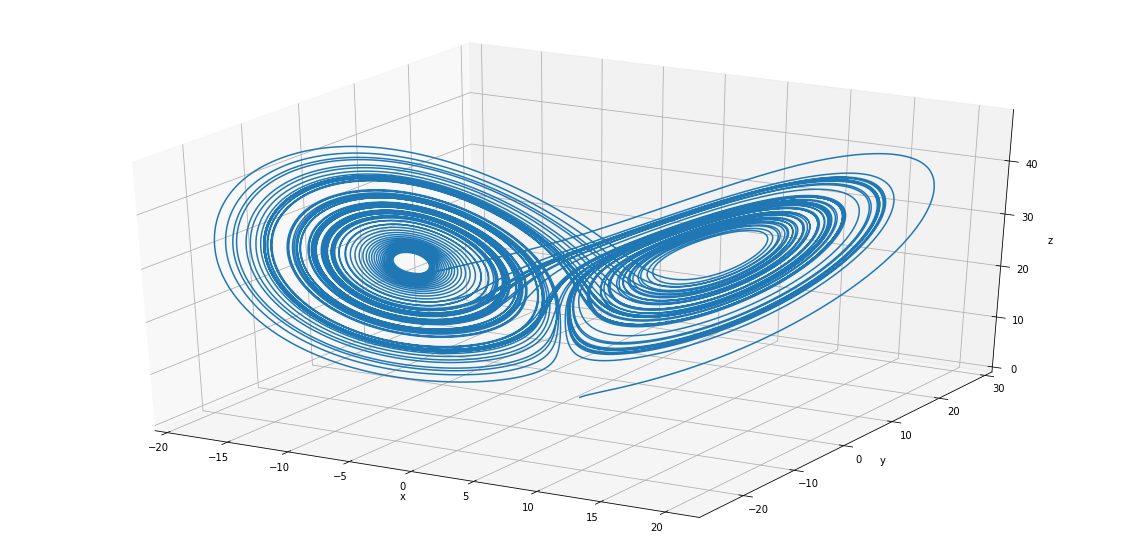

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot3D(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 't')

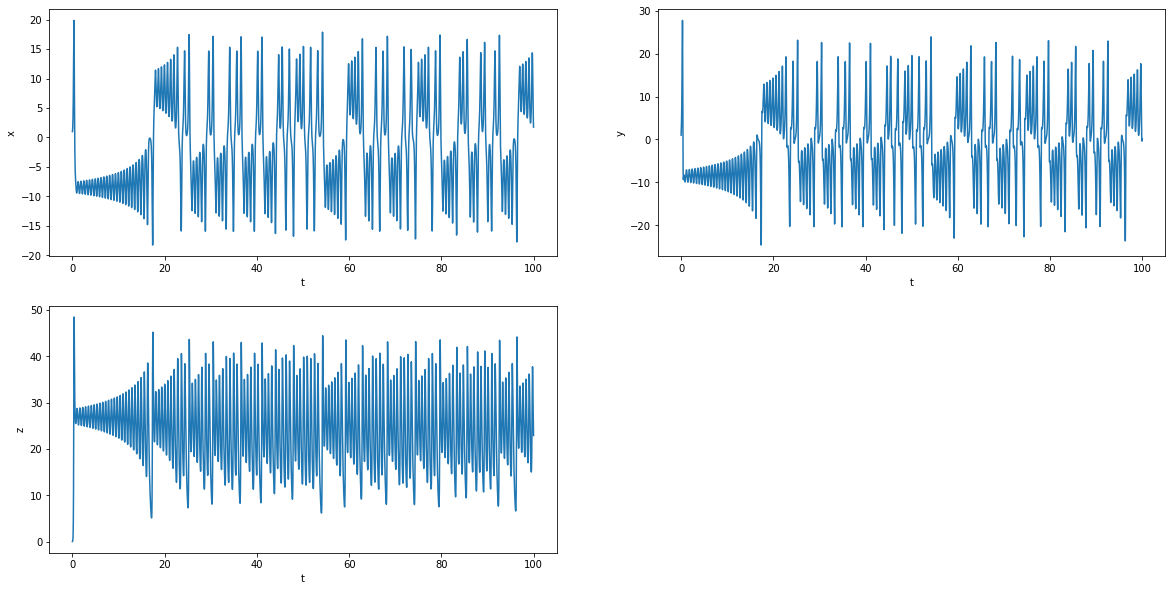

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(2,2,2)
plt.plot(t,y)
plt.ylabel('y')
plt.xlabel('t')

plt.subplot(2,2,3)
plt.plot(t,z)
plt.ylabel('z')
plt.xlabel('t')

## Diagrama de Bifurcaciones 

In [7]:
def event_lorenz(t,xyz,sigma,beta,rho):
    x,y,z = xyz
    return x+y

event_lorenz.direction = -1

In [8]:
time = [0,50]
t = np.linspace(time[0],time[1],10000)
init_condi = [0.1,0.1,0.1]

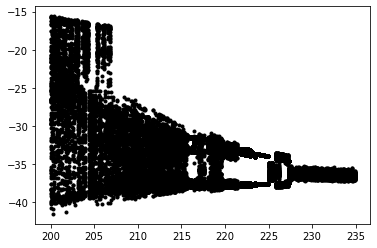

In [9]:
rs = np.arange(200,235,0.1)
for r in rs:
    solucion = solve_ivp(Lorenz_eq,time,init_condi,events=[event_lorenz],args=[10,8/3,r],t_eval=t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_ > 20:
            plt.plot(r,solucion.y_events[0][i,1],'.k')
    init_condi = solucion.y[:,-1]